# Arbitrarily high order accurate explicit time integration methods

 1. Chapter 5: ADER and DeC
    1. [Section 1.1: DeC](#DeC)
    1. [Section 1.2: ADER](#ADER)

## Deferred Correction (Defect correction/ Spectral deferred correction)<a id='DeC'></a>
Acronyms: DeC, DEC, DC, SDC

References: [Dutt et al. 2000](https://link.springer.com/article/10.1023/A:1022338906936), [Minion (implicit) 2003](https://projecteuclid.org/journals/communications-in-mathematical-sciences/volume-1/issue-3/Semi-implicit-spectral-deferred-correction-methods-for-ordinary-differential-equations/cms/1250880097.full), [Abgrall 2017 (for PDE)](https://hal.archives-ouvertes.fr/hal-01445543v2)

We study Abgrall's version (for notation)

Theory on slides!

In [1]:
# If you do not have numpy, matplotlib, scipy or nodepy, run this cell
!pip install numpy
# This is the basic package in python with all the numerical functions

!pip install scipy
# This package has some functions to deal with polynomials

!pip install matplotlib
# This package allows to  plot

!pip install nodepy
# This package has some interesting features for RK methods

In [1]:
# We need a couple of packages in this chapter
import numpy as np  
# This is the basic package in python with all the numerical functions

import matplotlib.pyplot as plt 
# This package allows to  plot

from nodepy import rk
#This package already implemented some functions for Runge Kutta and multistep methods

#from timeit import timeit
import timeit
import csv

For the definition of the basis functions in time, we introduce different Lagrange polynomials and point distributions:
1. equispaced
1. Gauss--Legendre--Lobatto (GLB)
1. Gauss--Legendre (not in DeC, because the last point is not $t^{n+1}$)

So, we have the quadrature points $\lbrace t^m \rbrace_{m=0}^M$, the polynomials $\lbrace \varphi_m \rbrace_{m=0}^M$ such that $\varphi_j(t^m)=\delta_{j}^m$, and we are interested in computing

$$
\theta_r^m:=\int_{t^0}^{t^m} \varphi_r(t) dt
$$

To compute the integral we will use exact quadrature rules with Gauss--Lobatto (GLB) points, i.e., given the quadrature nodes and weights $t_q, w_q$ on the interval $[0,1]$ the integral is computed as

$$
\theta_r^m:=\int_{t^0}^{t^m} \varphi_r(t) dt = \sum_q \varphi_r(t^q(t^m-t^0)+t^0) w_q(t^m-t^0) 
$$


In practice, at each timestep we have to loop over corrections $(k)$ and over subtimesteps $m$ and compute

$$
y^{m,(k)} = y^{m,(k-1)} - \left(  y^{m,(k-1)} -  y^{0} - \Delta t\sum_{r=0}^M \theta_r^m F(y^{r,(k-1)}) \right)=y^{0} + \Delta t\sum_{r=0}^M \theta_r^m F(y^{r,(k-1)})
$$

For very iteration we add the matrix of interpolation

$$
A_{mr}^{(p)} = \psi^{m,(p-1)}(t^{r,(p)}),\quad  m=0,\dots, \max(p-2,1), \quad r=0,\dots,p-1
$$

In [2]:
from src import DeC
from src import RungeKutta
from src import ODEproblems
from src.DeC import *
from src.ODEproblems import ODEproblem

In [3]:

def check_M(M_sub, order, nodes_type):
    if M_sub==-1:
        if "equispaced" in nodes_type:
            M_sub = order-1
        elif nodes_type=="gaussLobatto":
            M_sub = int(np.ceil(order/2))
        elif nodes_type=="gaussLegendre":
            M_sub = int(np.ceil((order-1)/2))
        else:
            M_sub = order-1
    
    if M_sub==0 and (nodes_type == "gaussLobatto" or "equispaced" in nodes_type):
        print(f"M_steps=0 is not enough to run with {nodes_type}, I run with M_steps=1")
        M_sub = 1
    return M_sub

Folder already exists
The stability region is unbounded
      2
-0.5 x - 1 x + 1
------------------
   2
1 x - 2 x + 1
2
The stability region is unbounded
          6           5          4           3        2
0.006402 x + 0.01085 x - 0.1302 x - 0.08333 x + 1.25 x - 2 x + 1
------------------
         6          5          4       3        2
0.01562 x - 0.1875 x + 0.9375 x - 2.5 x + 3.75 x - 3 x + 1
3
The stability region is unbounded
      2
-0.5 x - 1 x + 1
------------------
   2
1 x - 2 x + 1
2
The stability region is unbounded
          6           5          4           3        2
0.006402 x + 0.01085 x - 0.1302 x - 0.08333 x + 1.25 x - 2 x + 1
------------------
         6          5          4       3        2
0.01562 x - 0.1875 x + 0.9375 x - 2.5 x + 3.75 x - 3 x + 1
3


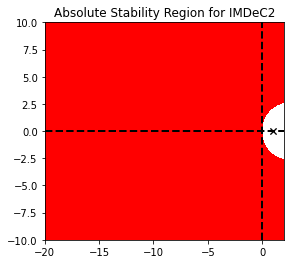

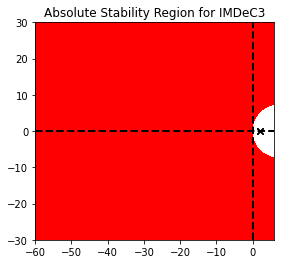

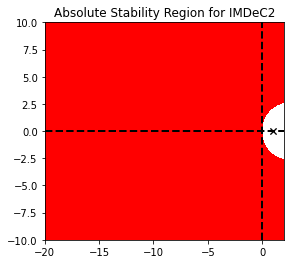

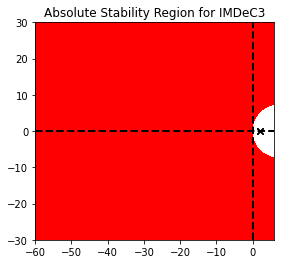

In [8]:
import os
folderName = "IMsDeC_stab"
try:
    os.mkdir(folderName)
except:
    print("Folder already exists")
for nodes_type in ["equispaced","gaussLobatto"]:
    for order in range(2, 14):
        M_sub = check_M(-1, order,nodes_type )
        mydec= DeC_small_sub(order-1,order,nodes_type)
        mydec.compute_theta_DeC()
        A,b,c = mydec.compute_RK_from_DeCImplicit()
        myrk = rk.RungeKuttaMethod(A,b,c)
        myrk.name=f"IMDeC{order}"
        myrk.plot_stability_region()
        #n,d = myrk.stability_function()
        #print(n)
        #print("------------------")
        #print(d)
        plt.savefig(f"{folderName}/IMDeC_{nodes_type}_{order}.png", transparent=False)
        plt.savefig(f"{folderName}/IMDeC_{nodes_type}_{order}.pdf")
        print(myrk.order())

Folder already exists
The stability region is unbounded
      2
-0.5 x - 1 x + 1
------------------
   2
1 x - 2 x + 1
2
The stability region is unbounded
           6          5           4         3        2
-0.003472 x + 0.1319 x - 0.08333 x - 1.708 x + 4.25 x - 3.5 x + 1
------------------
       6         5         4         3        2
0.125 x - 1.125 x + 4.125 x - 7.875 x + 8.25 x - 4.5 x + 1
3
The stability region is unbounded
      2
-0.5 x - 1 x + 1
------------------
   2
1 x - 2 x + 1
2
The stability region is unbounded
           6          5           4         3        2
-0.003472 x + 0.1319 x - 0.08333 x - 1.708 x + 4.25 x - 3.5 x + 1
------------------
       6         5         4         3        2
0.125 x - 1.125 x + 4.125 x - 7.875 x + 8.25 x - 4.5 x + 1
3


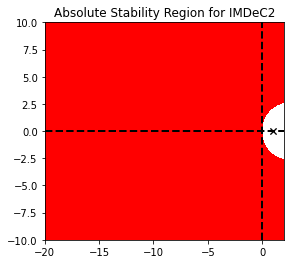

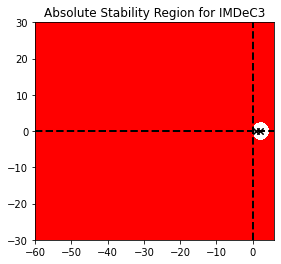

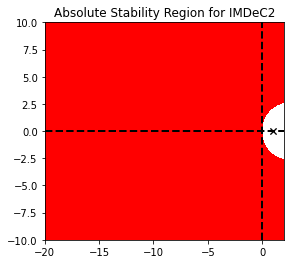

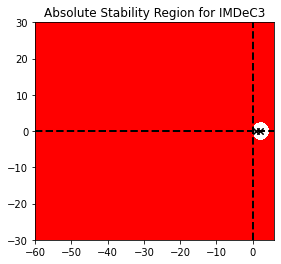

In [10]:
import os
folderName = "IMbDeC_stab"
try:
    os.mkdir(folderName)
except:
    print("Folder already exists")
for nodes_type in ["equispaced","gaussLobatto"]:
    for order in range(2, 14):
        M_sub = check_M(-1, order,nodes_type )
        mydec= DeC(order-1,order,nodes_type)
        mydec.compute_theta_DeC()
        A,b,c = mydec.compute_RK_from_DeCImplicit2()
        myrk = rk.RungeKuttaMethod(A,b,c)
        myrk.name=f"IMDeC{order}"
        myrk.plot_stability_region()
        #n,d = myrk.stability_function()
        #print(n)
        #print("------------------")
        #print(d)
        plt.savefig(f"{folderName}/IMDeC_{nodes_type}_{order}.png", transparent=False)
        plt.savefig(f"{folderName}/IMDeC_{nodes_type}_{order}.pdf")
        print(myrk.order())

0.0012432402937552298
0.001634928060946714
0.001448458234610615


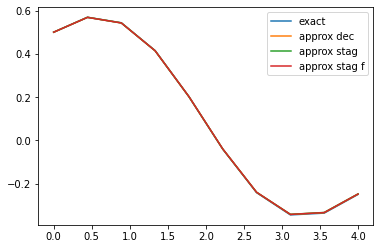

In [3]:
order=3
dec_method=DeC_small_sub(order-1,order,"equispaced")
dec_stag=DeC_small_sub_staggered(order-1,order,"equispaced")
dec_stag_f=DeC_small_sub_staggered_f(order-1,order,"equispaced")
#Test convergence of DeC for several orders
pr=ODEproblem("vibratingDamped")

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + (c[0,t]-c_exact[0,t])**2.
    error = np.sqrt(error/times) 
    return error


tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
tt,uu=dec_method.dec(pr.flux, tt, pr.u0)

u_ex = pr.exact_solution_times(pr.u0,tt)
    

plt.plot(tt,u_ex[1,:],label="exact")


tt,uu = dec_method.dec(pr.flux, tt, pr.u0)
plt.plot(tt,uu[0,:],label="approx dec")
print(compute_integral_error(uu,u_ex))

tt,uu = dec_stag.dec(pr.flux, tt, pr.u0)
plt.plot(tt,uu[0,:],label="approx stag")
print(compute_integral_error(uu,u_ex))

#%time dec_stag_f.dec(pr.flux, tt, pr.u0)
tt,uu = dec_stag_f.dec(pr.flux, tt, pr.u0)
plt.plot(tt,uu[0,:],label="approx stag f")
print(compute_integral_error(uu,u_ex))



plt.legend()



In [4]:
t = timeit.Timer(lambda: dec_method.dec(pr.flux, tt, pr.u0)) 
t.timeit(100)/100

0.0013991453987546266

order= 2
dt is  0.25
122 µs ± 786 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
error 0.29877083765879353
131 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
error 0.29877083765879353
153 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
error 0.29877083765879353
141 µs ± 884 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
error 0.29877083765879353
189 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
error 0.29877083765879353
170 µs ± 4.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
error 0.29877083765879353
speed up factor DeC_equispaced 1.0
speed up factor DeC_stag_equispaced 0.9347837391992817
speed up factor DeC_stag_f_equispaced 0.7978451924485092
speed up factor DeC_small_equispaced 1.0
speed up factor DeC_small_stag_equispaced 0.7443900550300034
speed up factor DeC_small_stag_f_equispaced 0.8313623159082997
dt is  0.125
309 µs ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loo

KeyboardInterrupt: 

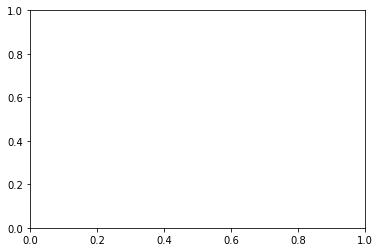

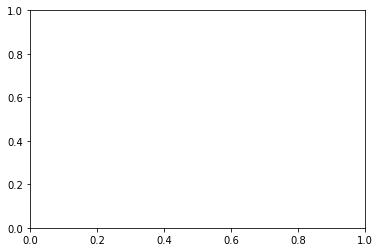

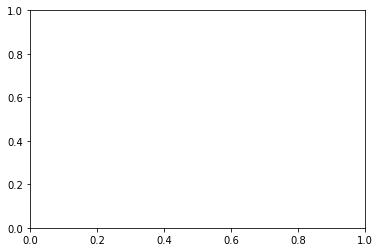

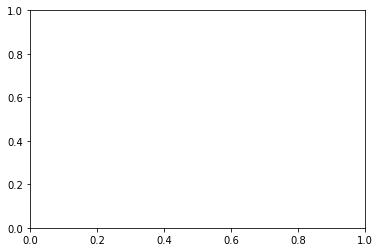

In [5]:
#Test convergence of DeC for several orders
pr=ODEproblem("linear_system2")

tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
dec8 = DeC_staggered(7, 8, "equispaced")
tt,uu=dec8.dec(pr.flux, tt, pr.u0)
# plt.plot(tt,uu[0,:])
# plt.plot(tt,uu[1,:])
# plt.show()

colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",\
       "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(2,2+NN)]


methods = [DeC, DeC_staggered, DeC_staggered_f, DeC_small_sub, DeC_small_sub_staggered, DeC_small_sub_staggered_f]
N_meth = len(methods)

errors=np.zeros((N_meth,len(dts)))
times =np.zeros((N_meth,len(dts)))

fig1,ax1 = plt.subplots(1,1)
fig2,ax2 = plt.subplots(1,1)
fig3,ax3 = plt.subplots(1,1)
fig4,ax4 = plt.subplots(1,1)



# Compute and plot the errors 
for order in range(2,3):
    myFile = open(f'convergence_{pr.name}_order_{order}.csv', 'w')
    with myFile:
        writer = csv.writer(myFile)
        myData = ["dt"]
        for met in methods:
            myData.append("error "+met(1,2,"equispaced").name)            
        for met in methods:
            myData.append("time "+met(1,2,"equispaced").name)
        writer.writerow(myData)
        print("order=",order)
        for k in range(NN):
            dt0=dts[k]
            print("dt is ",dt0)
            tt=np.arange(0,pr.T_fin,dt0)
            M_sub = order-1
            K_iter = order

            for im, method in enumerate(methods):
                # Staggered DeC
                dec = method(M_sub, K_iter, "equispaced")
                res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
                times[im,k] = res.average
                t2,U2=dec.dec(pr.flux, tt, pr.u0)
                u_exact=pr.exact_solution_times(pr.u0,tt)
                errors[im,k]=compute_integral_error(U2,u_exact)
                print(f"error {errors[im,k]}")
            
            
            myData = [dt0]
            for im in range(N_meth):
                myData.append(errors[im,k])
            for im in range(N_meth):
                myData.append(times[im,k])
            writer.writerow(myData)
            
            
            for im, method in enumerate(methods):
                print("speed up factor "+method(1,2,"equispaced").name, times[(im//3)*3,k]/times[im,k] )
            
        ax1.loglog(dts,errors[0,:],"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,errors[1,:],"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,errors[2,:],"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,[dt**(order)*errors[0,2]/dts[2]**(order) for dt in dts],":",color=colors[order])#,label="ref %d"%(order))

        ax2.loglog(times[0,:],errors[0,:],"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax2.loglog(times[1,:],errors[1,:],"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax2.loglog(times[2,:],errors[2,:],"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
    #    ax2.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))

                
        ax3.loglog(dts,errors[3,:],"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax3.loglog(dts,errors[4,:],"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax3.loglog(dts,errors[5,:],"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax3.loglog(dts,[dt**(order)*errors[3,2]/dts[2]**(order) for dt in dts],":",color=colors[order])#,label="ref %d"%(order))

        ax4.loglog(times[3,:],errors[3,:],"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax4.loglog(times[4,:],errors[4,:],"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax4.loglog(times[5,:],errors[5,:],"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
    #    ax2.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))

    

ax1.set_title("DeC error convergence")
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylabel("Error")
ax1.set_xlabel(r"$\Delta t$")
plt.tight_layout()
fig1.savefig(f"convergence_DeC_staggered_{pr.name}.pdf")

ax2.set_title("DeC error convergence")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylabel("Error")
ax2.set_xlabel("Computational time")
plt.tight_layout()
fig2.savefig(f"convergence_vs_time_DeC_staggered_{pr.name}.pdf")


ax3.set_title("DeC error convergence")
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.set_ylabel("Error")
ax3.set_xlabel(r"$\Delta t$")
plt.tight_layout()
fig3.savefig(f"convergence_DeC_staggered_small_sub_{pr.name}.pdf")

ax4.set_title("DeC error convergence")
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax4.set_ylabel("Error")
ax4.set_xlabel("Computational time")
plt.tight_layout()
fig4.savefig(f"convergence_vs_time_DeC_staggered_small_sub_{pr.name}.pdf")


plt.show()



order= 2
dt is  1.0
331 µs ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
error 0.09366813594980032
331 µs ± 57.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
error 0.09366813594980032
295 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
error 0.09366813594980032
speed up factor  0.8917411446641842
speed up factor_F 0.8907665021486318
dt is  0.5
680 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
error 0.02302381796760029
605 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
error 0.02302381796760029
530 µs ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
error 0.02302381796760029
speed up factor  0.7795495670344544
speed up factor_F 0.8754390221372581
dt is  0.25
1.47 ms ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
error 0.005963516905737905
1.28 ms ± 2.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
error 0.005963516905737905
1.13 ms ± 27.7 µs per lo

4.59 ms ± 45.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
error 1.4103257473545087e-06
7.88 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
error 1.7475563573533101e-06
speed up factor  1.30059106428966
speed up factor_F 1.7176235618403926
dt is  0.25
13.7 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
error 3.8535260060123726e-08
9.89 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
error 2.684176244453324e-08
17.3 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
error 3.072199309744475e-08
speed up factor  1.2553742506508963
speed up factor_F 1.744706688812883
dt is  0.125
26.7 ms ± 403 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
error 6.189825243680837e-10
21.2 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
error 4.5752023768480524e-10
35.1 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
error 5.091593209795182e-10
speed up factor  1.3176118324073398
s

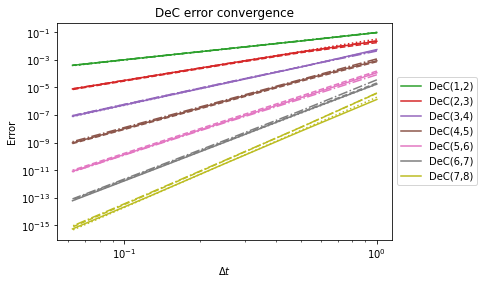

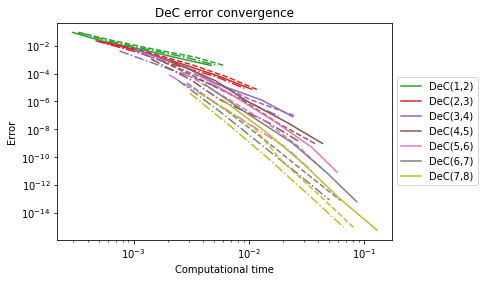

In [21]:
#Test convergence of DeC for several orders
pr=ODEproblem("vibratingDamped")

tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
dec8 = DeC_staggered(7, 8, "equispaced")
tt,uu=dec8.dec(pr.flux, tt, pr.u0)
# plt.plot(tt,uu[0,:])
# plt.plot(tt,uu[1,:])
# plt.show()

colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",\
       "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + (c[0,t]-c_exact[0,t])**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(2,2+NN)]
errorsDeCStag=np.zeros(len(dts))
errorsDeCStag_f=np.zeros(len(dts))
errorsDeC=np.zeros(len(dts))
timesDeC=np.zeros(len(dts))
timesDeCStag=np.zeros(len(dts))
timesDeCStag_f=np.zeros(len(dts))

fig1,ax1 = plt.subplots(1,1)
fig2,ax2 = plt.subplots(1,1)


# Compute and plot the errors 
for order in range(2,9):
    myFile = open(f'convergence_{pr.name}_order_{order}.csv', 'w')
    with myFile:
        writer = csv.writer(myFile)
        myData = ["dt", "error DeC", "error Stag DeC","error Stag DeC f", "time DeC", "time Stag DeC","time Stag DeC f"]
        writer.writerow(myData)
        print("order=",order)
        for k in range(NN):
            dt0=dts[k]
            print("dt is ",dt0)
            tt=np.arange(0,pr.T_fin,dt0)
            M_sub = order-1
            K_iter = order

            # Staggered DeC
            dec = DeC_staggered(M_sub, K_iter, "equispaced")
            res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
            timesDeCStag[k] = res.average
            t2,U2=dec.dec(pr.flux, tt, pr.u0)
            u_exact=pr.exact_solution_times(pr.u0,tt)
            errorsDeCStag[k]=compute_integral_error(U2,u_exact)
            print(f"error {errorsDeCStag[k]}")
            
            
            # Staggered DeC
            dec = DeC_staggered_f(M_sub, K_iter, "equispaced")
            res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
            timesDeCStag_f[k] = res.average
            t2,U2=dec.dec(pr.flux, tt, pr.u0)
            u_exact=pr.exact_solution_times(pr.u0,tt)
            errorsDeCStag_f[k]=compute_integral_error(U2,u_exact)
            print(f"error {errorsDeCStag_f[k]}")

            #Normal DeC
            dec = DeC(M_sub, K_iter, "equispaced")
            res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
            timesDeC[k] = res.average
            t2,U2=dec.dec(pr.flux, tt, pr.u0)
            u_exact=pr.exact_solution_times(pr.u0,tt)
            errorsDeC[k]=compute_integral_error(U2,u_exact)
            print(f"error {errorsDeC[k]}")
            
            myData = [dt0, errorsDeC[k], errorsDeCStag[k],errorsDeCStag_f[k], timesDeC[k], timesDeCStag[k],timesDeCStag_f[k]]
            writer.writerow(myData)
            
            print("speed up factor ", timesDeC[k]/timesDeCStag[k] )
            print("speed up factor_F", timesDeC[k]/timesDeCStag_f[k] )
            
        ax1.loglog(dts,errorsDeC,"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,errorsDeCStag,"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,errorsDeCStag_f,"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",color=colors[order])#,label="ref %d"%(order))

        ax2.loglog(timesDeC,errorsDeC,"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax2.loglog(timesDeCStag,errorsDeCStag,"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax2.loglog(timesDeCStag_f,errorsDeCStag_f,"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
    #    ax2.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))


ax1.set_title("DeC error convergence")
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylabel("Error")
ax1.set_xlabel(r"$\Delta t$")
plt.tight_layout()
fig1.savefig(f"convergence_DeC_staggered_{pr.name}.pdf")

ax2.set_title("DeC error convergence")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylabel("Error")
ax2.set_xlabel("Computational time")
plt.tight_layout()
fig2.savefig(f"convergence_vs_time_DeC_staggered_{pr.name}.pdf")


plt.show()


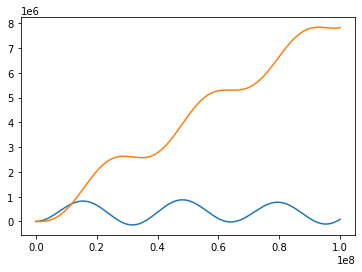

In [6]:
#Test convergence of DeC for several orders
pr=ODEproblem("threeBodies")

tt=np.linspace(0,pr.T_fin,2049)   #Plot the evolution for order 8
dec8 = DeC(8, 9, "gaussLobatto")
tt_exact,uu_exact=dec8.dec(pr.flux, tt, pr.u0)
plt.plot(tt_exact,uu_exact[0,:])
plt.plot(tt_exact,uu_exact[1,:])
plt.show()


In [4]:
%timeit np.exp(8)
%timeit np.sin(8)
%timeit 8**3

1.01 µs ± 2.98 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.03 µs ± 28.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
6.6 ns ± 0.0354 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


order= 2
dt is  6250000.0
3.07 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.85 ms ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
speed up factor  0.9303555482298598
dt is  3125000.0
6.58 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.19 ms ± 42.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
speed up factor  0.9400763570155345
dt is  1562500.0
13.5 ms ± 408 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.7 ms ± 616 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
speed up factor  0.9407494426695077
dt is  781250.0
23.1 ms ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.3 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up factor  0.9206573170214064
dt is  390625.0
46.2 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
42.6 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up factor  0.9229009447837349
order= 3
dt is  6

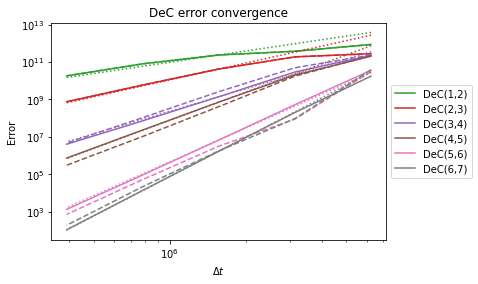

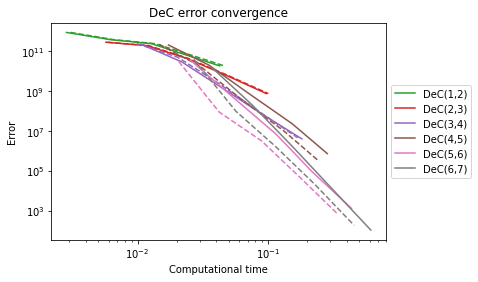

In [7]:

colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",\
       "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

def compute_integral_error(tt,c,tt_exact,c_exact):  # c is dim x times
    error=0.
    iex=0
    for it, t in enumerate(tt):
        while (t> tt_exact[iex]+1e-5):
            iex+=1
        error = error + np.linalg.norm(c[:,it]-c_exact[:,iex],2)**2.
    error = np.sqrt(error/len(tt)) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(4,4+NN)]
errorsDeCStag=np.zeros(len(dts))
errorsDeC=np.zeros(len(dts))
timesDeC=np.zeros(len(dts))
timesDeCStag=np.zeros(len(dts))

fig1,ax1 = plt.subplots(1,1)
fig2,ax2 = plt.subplots(1,1)


# Compute and plot the errors 
for order in range(2,8):
    myFile = open(f'convergence_{pr.name}_order_{order}.csv', 'w')
    with myFile:
        writer = csv.writer(myFile)
        myData = ["dt", "error DeC", "error Stag DeC", "time DeC", "time Stag DeC"]
        writer.writerow(myData)
        print("order=",order)
        for k in range(NN):
            dt0=dts[k]
            print("dt is ",dt0)
            tt=np.arange(0,pr.T_fin,dt0)
            M_sub = order-1
            K_iter = order

            # Staggered DeC
            dec = DeC_staggered(M_sub, K_iter, "equispaced")
            res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
            timesDeCStag[k] = res.average
            t2,U2=dec.dec(pr.flux, tt, pr.u0)
            #u_exact=pr.exact_solution_times(pr.u0,tt)
            errorsDeCStag[k]=compute_integral_error(t2,U2,tt_exact,uu_exact)

            #Normal DeC
            dec = DeC(M_sub, K_iter, "equispaced")
            res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
            timesDeC[k] = res.average
            t2,U2=dec.dec(pr.flux, tt, pr.u0)
            #u_exact=pr.exact_solution_times(pr.u0,tt)
            errorsDeC[k]=compute_integral_error(t2,U2,tt_exact,uu_exact)
            
            myData = [dt0, errorsDeC[k], errorsDeCStag[k], timesDeC[k], timesDeCStag[k]]
            writer.writerow(myData)
            
            print("speed up factor ", timesDeC[k]/timesDeCStag[k] )
            
        ax1.loglog(dts,errorsDeC,"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,errorsDeCStag,"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",color=colors[order])#,label="ref %d"%(order))

        ax2.loglog(timesDeC,errorsDeC,"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax2.loglog(timesDeCStag,errorsDeCStag,"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
    #    ax2.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))


ax1.set_title("DeC error convergence")
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylabel("Error")
ax1.set_xlabel(r"$\Delta t$")
fig1.savefig(f"convergence_DeC_staggered_{pr.name}.pdf")

ax2.set_title("DeC error convergence")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylabel("Error")
ax2.set_xlabel("Computational time")
fig2.savefig(f"convergence_vs_time_DeC_staggered_{pr.name}.pdf")

plt.show()


order= 2
dt is  0.125
344 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
260 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
speed up factor  0.75524775544305
dt is  0.0625
723 µs ± 4.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
557 µs ± 2.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
speed up factor  0.770246652062469
dt is  0.03125
1.5 ms ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.15 ms ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
speed up factor  0.7643417096759315
dt is  0.015625
3 ms ± 6.21 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.33 ms ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
speed up factor  0.7768101619377483
dt is  0.0078125
6.06 ms ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.73 ms ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
speed up factor  0.7809273790253339
order= 3
dt is  0.125

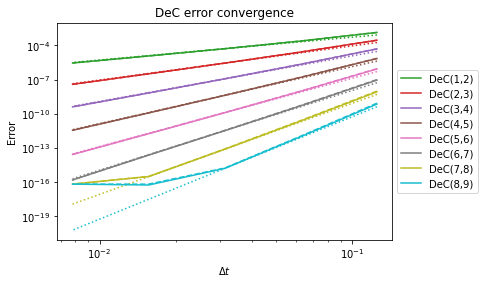

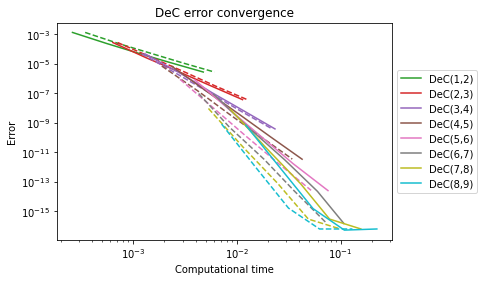

In [8]:
#Test convergence of DeC for several orders
pr=ODEproblem("nonlinear_scalar")

tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
dec8 = DeC_staggered(7, 8, "equispaced")
tt,uu=dec8.dec(pr.flux, tt, pr.u0)
# plt.plot(tt,uu[0,:])
# plt.plot(tt,uu[1,:])
# plt.show()

colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",\
       "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(3,3+NN)]
errorsDeCStag=np.zeros(len(dts))
errorsDeC=np.zeros(len(dts))
timesDeC=np.zeros(len(dts))
timesDeCStag=np.zeros(len(dts))

fig1,ax1 = plt.subplots(1,1)
fig2,ax2 = plt.subplots(1,1)


# Compute and plot the errors 
for order in range(2,10):
    myFile = open(f'convergence_{pr.name}_order_{order}.csv', 'w')
    with myFile:
        writer = csv.writer(myFile)
        myData = ["dt", "error DeC", "error Stag DeC", "time DeC", "time Stag DeC"]
        writer.writerow(myData)
        print("order=",order)
        for k in range(NN):
            dt0=dts[k]
            print("dt is ",dt0)
            tt=np.arange(0,pr.T_fin,dt0)
            M_sub = order-1
            K_iter = order

            # Staggered DeC
            dec = DeC_staggered(M_sub, K_iter, "equispaced")
            res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
            timesDeCStag[k] = res.average
            t2,U2=dec.dec(pr.flux, tt, pr.u0)
            u_exact=pr.exact_solution_times(pr.u0,tt)
            errorsDeCStag[k]=compute_integral_error(U2,u_exact)

            #Normal DeC
            dec = DeC(M_sub, K_iter, "equispaced")
            res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
            timesDeC[k] = res.average
            t2,U2=dec.dec(pr.flux, tt, pr.u0)
            u_exact=pr.exact_solution_times(pr.u0,tt)
            errorsDeC[k]=compute_integral_error(U2,u_exact)
            
            myData = [dt0, errorsDeC[k], errorsDeCStag[k], timesDeC[k], timesDeCStag[k]]
            writer.writerow(myData)
            print("speed up factor ", timesDeC[k]/timesDeCStag[k] )
            
        ax1.loglog(dts,errorsDeC,"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,errorsDeCStag,"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",color=colors[order])#,label="ref %d"%(order))

        ax2.loglog(timesDeC,errorsDeC,"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax2.loglog(timesDeCStag,errorsDeCStag,"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
    #    ax2.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))


ax1.set_title("DeC error convergence")
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylabel("Error")
ax1.set_xlabel(r"$\Delta t$")
fig1.savefig(f"convergence_DeC_staggered_{pr.name}.pdf")

ax2.set_title("DeC error convergence")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylabel("Error")
ax2.set_xlabel("Computational time")
fig2.savefig(f"convergence_vs_time_DeC_staggered_{pr.name}.pdf")

plt.show()


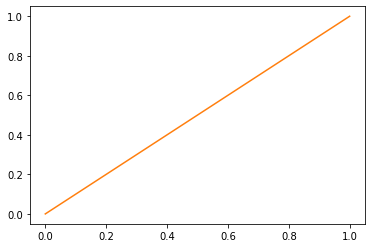

In [159]:
xx=np.linspace(0,1,10)
yy=xx
plt.plot(xx,yy,color="#ff7f0e")

In [ ]:
#Test convergence of DeC for several orders
pr=ODEproblem("nonlinear_scalar")

tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
dec8 = DeC_staggered_shifted_f(7, 8, "equispaced")
tt,uu=dec8.dec(pr.flux, tt, pr.u0)
# plt.plot(tt,uu[0,:])
# plt.plot(tt,uu[1,:])
# plt.show()

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(3,3+NN)]
errorsDeC=np.zeros(len(dts))


# Compute and plot the errors 
for order in range(2,10):
    for k in range(NN):
        dt0=dts[k]
        tt=np.arange(0,pr.T_fin,dt0)
        M_sub = order-1
        K_iter = order
        dec = DeC_staggered_shifted_f(M_sub, K_iter, "equispaced")
        t2,U2=dec.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errorsDeC[k]=compute_integral_error(U2,u_exact)

    plt.loglog(dts,errorsDeC,"--",label="DeC(%d,%d)"%(M_sub,K_iter))
    plt.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))


plt.title("DeC error convergence")
plt.legend(loc="lower right")
plt.savefig("convergence_DeC_staggered_f_%s.pdf"%(pr.name))
plt.show()


In [ ]:
#Test convergence of DeC for several orders
pr=ODEproblem("nonlinear_scalar")

tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
dec8 = DeC_staggered(7, 8, "equispaced")
tt,uu=dec8.dec(pr.flux, tt, pr.u0)
# plt.plot(tt,uu[0,:])
# plt.plot(tt,uu[1,:])
# plt.show()

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(3,3+NN)]
errorsDeC=np.zeros(len(dts))


# Compute and plot the errors 
for order in range(2,10):
    for k in range(NN):
        dt0=dts[k]
        tt=np.arange(0,pr.T_fin,dt0)
        M_sub = order-1
        K_iter = order+1
        dec = DeC_staggered(M_sub, K_iter, "equispaced")
        t2,U2=dec.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errorsDeC[k]=compute_integral_error(U2,u_exact)

    plt.loglog(dts,errorsDeC,"--",label="DeC(%d,%d)"%(M_sub,K_iter))
    plt.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))


plt.title("DeC error convergence")
plt.legend(loc="lower right")
plt.savefig("convergence_DeC_staggered_%s.pdf"%(pr.name))
plt.show()


In [ ]:
#Test convergence of DeC for several orders
pr=ODEproblem("linear_system2")

tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
dec8 = DeC(7, 8, "equispaced")
tt,uu=dec8.dec(pr.flux, tt, pr.u0)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])
plt.show()

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(3,3+NN)]
errorsDeC=np.zeros(len(dts))


# Compute and plot the errors 
for order in range(2,10):
    for k in range(NN):
        dt0=dts[k]
        tt=np.arange(0,pr.T_fin,dt0)
        dec = DeC(order-1, order, "gaussLobatto")
        t2,U2=dec.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errorsDeC[k]=compute_integral_error(U2,u_exact)

    plt.loglog(dts,errorsDeC,"--",label="DeC%d"%(order))
    plt.loglog(dts,[dt**order*errorsDeC[2]/dts[2]**order for dt in dts],":",label="ref %d"%(order))


plt.title("DeC error convergence")
plt.legend()
#plt.savefig("convergence_DeC.pdf")
plt.show()


!-----------------------------------!
!-----Corrections 3----------------!
!-----------------------------------!
DeC-corr-3 has order 3
DeC-corr-3 has 5 stages


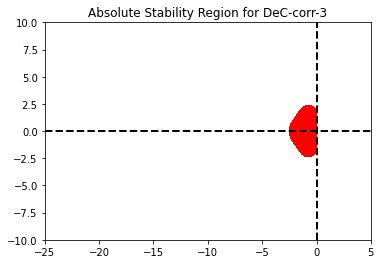

!-----------------------------------!
!-----Corrections 4----------------!
!-----------------------------------!
DeC-corr-4 has order 4
DeC-corr-4 has 7 stages


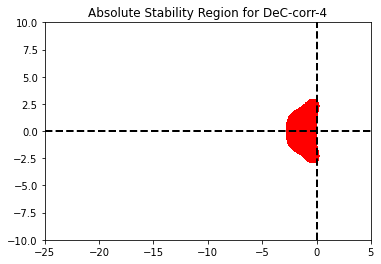

!-----------------------------------!
!-----Corrections 5----------------!
!-----------------------------------!
DeC-corr-5 has order 4
DeC-corr-5 has 9 stages


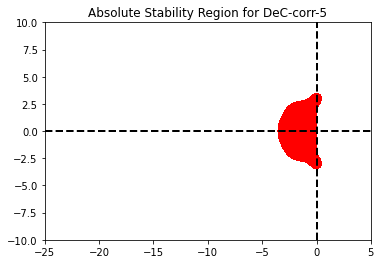

!-----------------------------------!
!-----Corrections 6----------------!
!-----------------------------------!
DeC-corr-6 has order 4
DeC-corr-6 has 11 stages


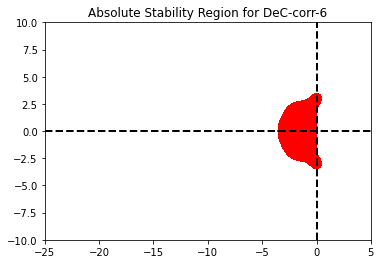

!-----------------------------------!
!-----Corrections 7----------------!
!-----------------------------------!
DeC-corr-7 has order 4
DeC-corr-7 has 13 stages


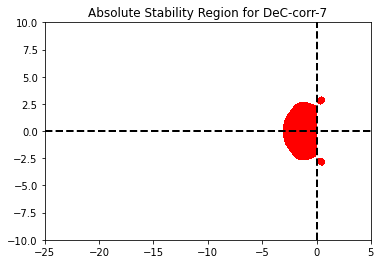

!-----------------------------------!
!-----Corrections 8----------------!
!-----------------------------------!
DeC-corr-8 has order 4
DeC-corr-8 has 15 stages


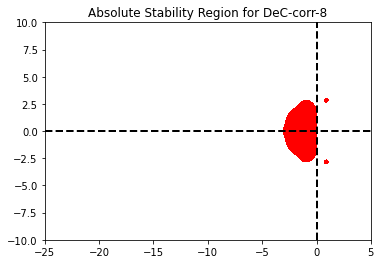

!-----------------------------------!
!-----Corrections 9----------------!
!-----------------------------------!
DeC-corr-9 has order 4
DeC-corr-9 has 17 stages


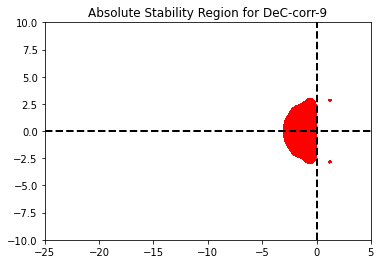

!-----------------------------------!
!-----Corrections 10----------------!
!-----------------------------------!
DeC-corr-10 has order 4
DeC-corr-10 has 19 stages


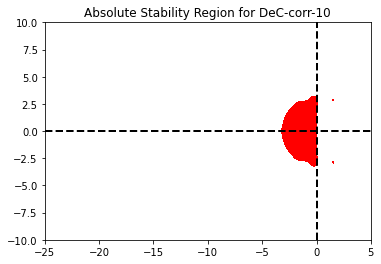

!-----------------------------------!
!-----Corrections 11----------------!
!-----------------------------------!
DeC-corr-11 has order 4
DeC-corr-11 has 21 stages


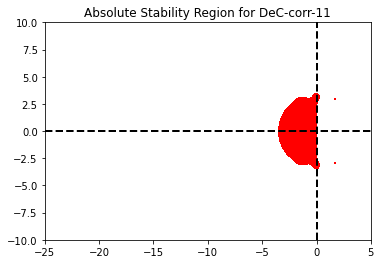

!-----------------------------------!
!-----Corrections 12----------------!
!-----------------------------------!
DeC-corr-12 has order 4
DeC-corr-12 has 23 stages


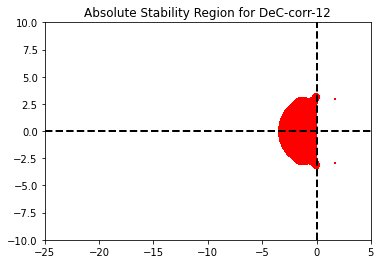

!-----------------------------------!
!-----Corrections 13----------------!
!-----------------------------------!
DeC-corr-13 has order 4
DeC-corr-13 has 25 stages


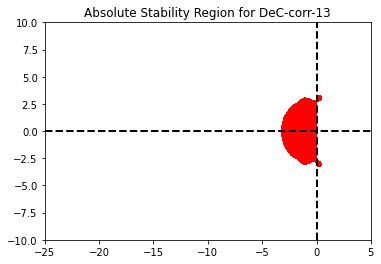

!-----------------------------------!
!-----Corrections 14----------------!
!-----------------------------------!
DeC-corr-14 has order 4
DeC-corr-14 has 27 stages


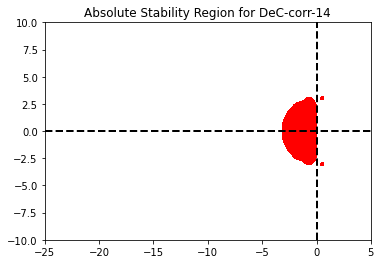

!-----------------------------------!
!-----Corrections 15----------------!
!-----------------------------------!
DeC-corr-15 has order 4
DeC-corr-15 has 29 stages


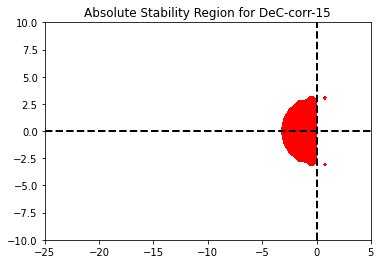

!-----------------------------------!
!-----Corrections 16----------------!
!-----------------------------------!
DeC-corr-16 has order 4
DeC-corr-16 has 31 stages


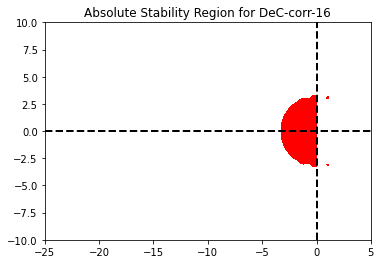

!-----------------------------------!
!-----Corrections 17----------------!
!-----------------------------------!
DeC-corr-17 has order 4
DeC-corr-17 has 33 stages


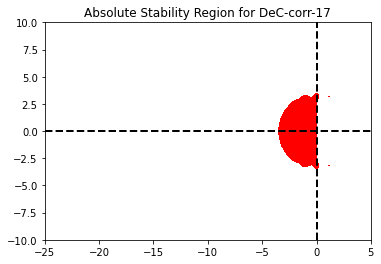

!-----------------------------------!
!-----Corrections 18----------------!
!-----------------------------------!
DeC-corr-18 has order 4
DeC-corr-18 has 35 stages


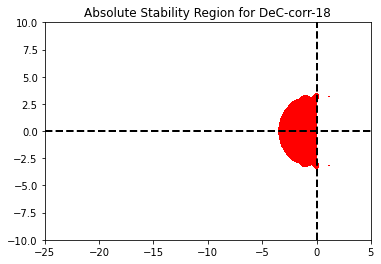

!-----------------------------------!
!-----Corrections 19----------------!
!-----------------------------------!
DeC-corr-19 has order 4
DeC-corr-19 has 37 stages


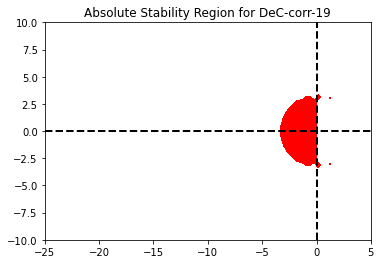

In [4]:
for corrections in range(3,20):
    print("!-----------------------------------!")
    print("!-----Corrections %d----------------!"%corrections)
    print("!-----------------------------------!")
    dec_method = DeC(2, corrections, "equispaced")
    A,b,c=dec_method.compute_RK_from_DeC()
    rkStaggeredDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkStaggeredDeC.name="DeC-corr-"+str(corrections)
    print(rkStaggeredDeC.name+" has order "+str(rkStaggeredDeC.order()))
    print(rkStaggeredDeC.name+" has %d stages"%(len(rkStaggeredDeC.c)))
        
    p1=rkStaggeredDeC.plot_stability_region(bounds=[-25,5,-10,10])
    plt.show()
#    if corrections<=7:
#        p,d = rkStaggeredDeC.stability_function()
#        print(p)
#        p,d = rkDeC.stability_function()
#        print(p)


In [1]:
from src.DeC import * 
from nodepy import rk

methods = [DeC, DeC_staggered, DeC_staggered_f]
methods_base_name = ["DeC", "DeC_stag", "DeC_stag_f"]
for order in range(3,14):
    print("!-----------------------------------!")
    print("!-----Order %d-----------------------!"%order)
    print("!-----------------------------------!")
    
    for im, method in enumerate(methods):
        dec_method = method(order-1, order, "equispaced")
        A,b,c=dec_method.compute_RK_from_DeC()
        rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
        rkDeC.name=methods_base_name[im]+"-equi"+str(order)
        print(rkDeC.name+" has order "+str(rkDeC.order()))
        print(rkDeC.name+" has %d stages"%(len(rkDeC.c)))
        
        dec_method = method(int((order+1)//2), order, "gaussLobatto")
        A,b,c=dec_method.compute_RK_from_DeC()
        rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
        rkDeC.name=methods_base_name[im]+"-GLB"+str(order)
        print(rkDeC.name+" has order "+str(rkDeC.order()))
        print(rkDeC.name+" has %d stages"%(len(rkDeC.c)))

#    dec_method = DeC_staggered(order-1, order, "equispaced")
#    A,b,c=dec_method.compute_RK_from_DeC()
#    rkStaggeredDeC = rk.ExplicitRungeKuttaMethod(A,b)
#    rkStaggeredDeC.name="Stag-DeC-equi"+str(order)
#    print(rkStaggeredDeC.name+" has order "+str(rkStaggeredDeC.order()))
#    print(rkStaggeredDeC.name+" has %d stages"%(len(rkStaggeredDeC.c)))

#    dec_method = DeC(order-1, order, "equispaced")
#    A,b,c=dec_method.compute_RK_from_DeC()
#    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
#    rkDeC.name="DeC-equi"+str(order)
    
#    print(rkDeC.name+" has order "+str(rkDeC.order()))
#    print(rkDeC.name+" has %d stages"%(len(rkDeC.c)))
#    p1=rkStaggeredDeC.plot_stability_region(bounds=[-5,5,-10,10])
#    plt.show()
#    p2=rkDeC.plot_stability_region(bounds=[-5,5,-10,10])
#    plt.show()
#    if order<=7:
#        p,d = rkStaggeredDeC.stability_function()
#        print(p)
#        p,d = rkDeC.stability_function()
#        print(p)


!-----------------------------------!
!-----Order 3-----------------------!
!-----------------------------------!
DeC-equi3 has order 3
DeC-equi3 has 5 stages
DeC-GLB3 has order 3
DeC-GLB3 has 5 stages
DeC_stag-equi3 has order 3
DeC_stag-equi3 has 5 stages
DeC_stag-GLB3 has order 3
DeC_stag-GLB3 has 5 stages
DeC_stag_f-equi3 has order 3
DeC_stag_f-equi3 has 4 stages
DeC_stag_f-GLB3 has order 3
DeC_stag_f-GLB3 has 4 stages
!-----------------------------------!
!-----Order 4-----------------------!
!-----------------------------------!
DeC-equi4 has order 4
DeC-equi4 has 10 stages
DeC-GLB4 has order 4
DeC-GLB4 has 7 stages
DeC_stag-equi4 has order 4
DeC_stag-equi4 has 9 stages
DeC_stag-GLB4 has order 4
DeC_stag-GLB4 has 7 stages
DeC_stag_f-equi4 has order 4
DeC_stag_f-equi4 has 7 stages
DeC_stag_f-GLB4 has order 4
DeC_stag_f-GLB4 has 6 stages
!-----------------------------------!
!-----Order 5-----------------------!
!-----------------------------------!
DeC-equi5 has order 5
DeC-equi5 h

In [ ]:
for order in range(3,14):
    print("!-----------------------------------!")
    print("!-----Order %d-----------------------!"%order)
    print("!-----------------------------------!")
    dec_method = DeC_staggered(order-1, order, "equispaced")
    A,b,c=dec_method.compute_RK_from_DeC()
    rkStaggeredDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkStaggeredDeC.name="Stag-DeC-equi"+str(order)
    print(rkStaggeredDeC.name+" has order "+str(rkStaggeredDeC.order()))
    print(rkStaggeredDeC.name+" has %d stages"%(len(rkStaggeredDeC.c)))
    
    dec_method = DeC(order-1, order, "equispaced")
    A,b,c=dec_method.compute_RK_from_DeC()
    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkDeC.name="DeC-equi"+str(order)
    
    print(rkDeC.name+" has order "+str(rkDeC.order()))
    print(rkDeC.name+" has %d stages"%(len(rkDeC.c)))
    p1=rkStaggeredDeC.plot_stability_region(bounds=[-5,5,-10,10])
    plt.show()
    p2=rkDeC.plot_stability_region(bounds=[-5,5,-10,10])
    plt.show()
    if order<=7:
        p,d = rkStaggeredDeC.stability_function()
        print(p)
        p,d = rkDeC.stability_function()
        print(p)


!-----------------------------------!
!-----Order 3-----------------------!
!-----------------------------------!
Stag-DeC-GLB3 has order 3
Stag-DeC-GLB3 has 5 stages
DeC-GLB3 has order 3
DeC-GLB3 has 5 stages


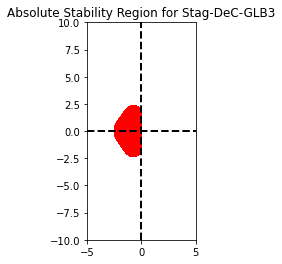

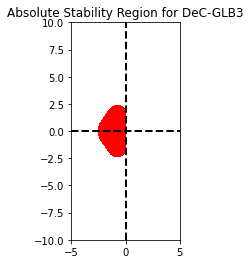

        3       2
0.1667 x + 0.5 x + 1 x + 1
        3       2
0.1667 x + 0.5 x + 1 x + 1
!-----------------------------------!
!-----Order 4-----------------------!
!-----------------------------------!
Stag-DeC-GLB4 has order 4
Stag-DeC-GLB4 has 9 stages
DeC-GLB4 has order 4
DeC-GLB4 has 10 stages


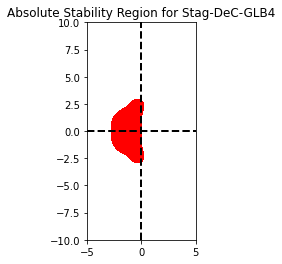

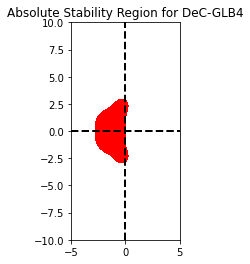

         4          3       2
0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
         4          3       2
0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
!-----------------------------------!
!-----Order 5-----------------------!
!-----------------------------------!
Stag-DeC-GLB5 has order 5
Stag-DeC-GLB5 has 14 stages
DeC-GLB5 has order 5
DeC-GLB5 has 17 stages


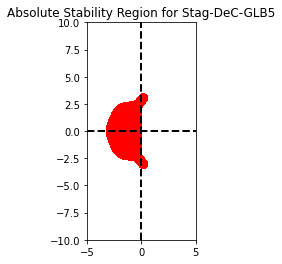

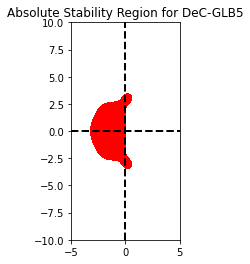

          5           4          3       2
0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
          5           4          3       2
0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
!-----------------------------------!
!-----Order 6-----------------------!
!-----------------------------------!
Stag-DeC-GLB6 has order 6
Stag-DeC-GLB6 has 20 stages
DeC-GLB6 has order 6
DeC-GLB6 has 26 stages


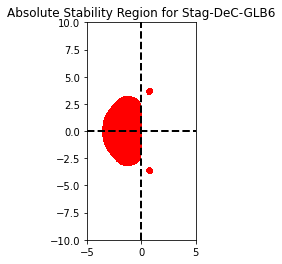

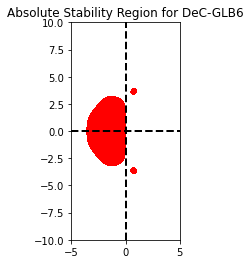

          6            5           4          3       2
0.001389 x + 0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
          6            5           4          3       2
0.001389 x + 0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
!-----------------------------------!
!-----Order 7-----------------------!
!-----------------------------------!
Stag-DeC-GLB7 has order 7
Stag-DeC-GLB7 has 27 stages
DeC-GLB7 has order 7
DeC-GLB7 has 37 stages


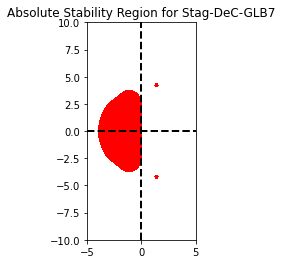

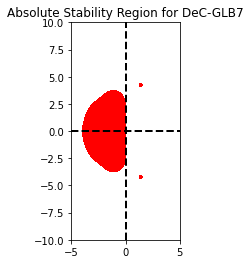

           7            6            5           4          3       2
0.0001984 x + 0.001389 x + 0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
           7            6            5           4          3       2
0.0001984 x + 0.001389 x + 0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
!-----------------------------------!
!-----Order 8-----------------------!
!-----------------------------------!
Stag-DeC-GLB8 has order 8
Stag-DeC-GLB8 has 35 stages
DeC-GLB8 has order 8
DeC-GLB8 has 50 stages


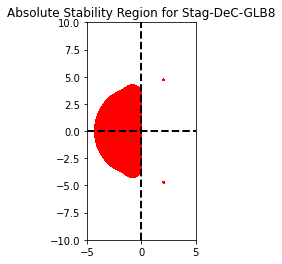

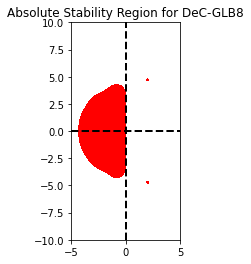

!-----------------------------------!
!-----Order 9-----------------------!
!-----------------------------------!
Stag-DeC-GLB9 has order 9
Stag-DeC-GLB9 has 44 stages
DeC-GLB9 has order 9
DeC-GLB9 has 65 stages


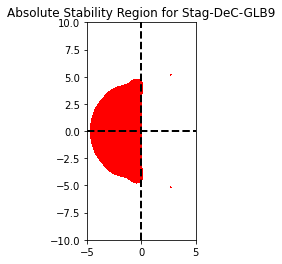

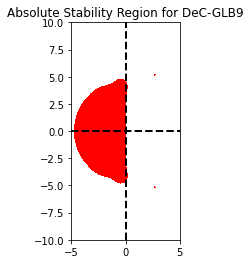

!-----------------------------------!
!-----Order 10-----------------------!
!-----------------------------------!
Stag-DeC-GLB10 has order 10
Stag-DeC-GLB10 has 54 stages
DeC-GLB10 has order 10
DeC-GLB10 has 82 stages


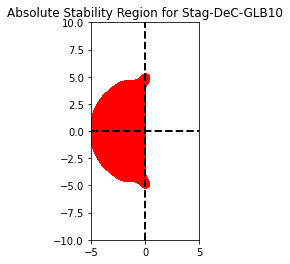

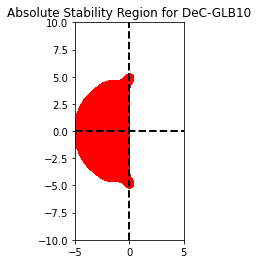

!-----------------------------------!
!-----Order 11-----------------------!
!-----------------------------------!
Stag-DeC-GLB11 has order 11
Stag-DeC-GLB11 has 65 stages
DeC-GLB11 has order 11
DeC-GLB11 has 101 stages


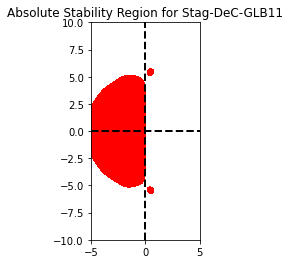

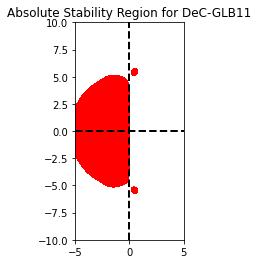

!-----------------------------------!
!-----Order 12-----------------------!
!-----------------------------------!
Stag-DeC-GLB12 has order 12
Stag-DeC-GLB12 has 77 stages
DeC-GLB12 has order 12
DeC-GLB12 has 122 stages


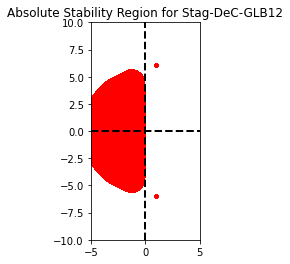

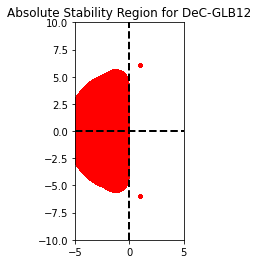

!-----------------------------------!
!-----Order 13-----------------------!
!-----------------------------------!
This routine only goes up to order 13.  Use oc_butcher_high_order for higher orders.
Stag-DeC-GLB13 has order 13
Stag-DeC-GLB13 has 90 stages
This routine only goes up to order 13.  Use oc_butcher_high_order for higher orders.
DeC-GLB13 has order 13
DeC-GLB13 has 145 stages


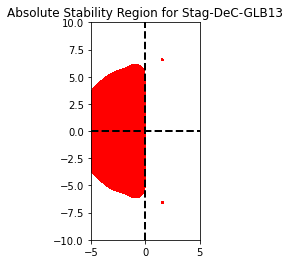

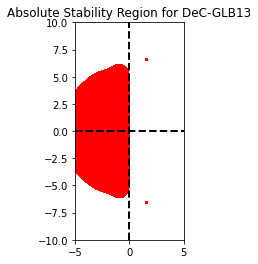

In [2]:
for order in range(3,14):
    print("!-----------------------------------!")
    print("!-----Order %d-----------------------!"%order)
    print("!-----------------------------------!")
    dec_method = DeC_staggered(order-1, order, "gaussLobatto")
    A,b,c=dec_method.compute_RK_from_DeC()
    rkStaggeredDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkStaggeredDeC.name="Stag-DeC-GLB"+str(order)
    print(rkStaggeredDeC.name+" has order "+str(rkStaggeredDeC.order()))
    print(rkStaggeredDeC.name+" has %d stages"%(len(rkStaggeredDeC.c)))
    
    dec_method = DeC(order-1, order, "gaussLobatto")
    A,b,c=dec_method.compute_RK_from_DeC()
    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkDeC.name="DeC-GLB"+str(order)
    
    print(rkDeC.name+" has order "+str(rkDeC.order()))
    print(rkDeC.name+" has %d stages"%(len(rkDeC.c)))
    p1=rkStaggeredDeC.plot_stability_region(bounds=[-5,5,-10,10])
    plt.show()
    p2=rkDeC.plot_stability_region(bounds=[-5,5,-10,10])
    plt.show()
    if order<=7:
        p,d = rkStaggeredDeC.stability_function()
        print(p)
        p,d = rkDeC.stability_function()
        print(p)


In [ ]:
# Checking the order of DeC as RK
decs=[[],[]]
for order in range(3,14):
    print(order)
    dec_method = DeC_staggered(order-1, order, "equispaced")
    decs.append(dec_method)
    A,b,c=dec_method.compute_RK_from_DeC()
    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkDeC.name="DeCequi"+str(order)
    print(rkDeC.name+" has order "+str(rkDeC.order()))
    rkDeC.plot_stability_region(bounds=[-10,40,-20,20])

In [ ]:
#Test the DeC on a three bodies problem (Earth, Mars and Sun)
pr=ODEproblem("threeBodies")
tt=np.linspace(0,pr.T_fin,1000)
dec5=DeC(3,5,"gaussLobatto")
tt,U=dec5.dec(pr.flux,tt,pr.u0)

plt.figure()                            # Evolution in time of the planets
plt.plot(U[0,:],U[1,:],'*',label="sun")
plt.plot(U[4,:],U[5,:],label="earth")
plt.plot(U[8,:],U[9,:],label="Mars")
plt.legend()
plt.show()

plt.figure()                                # Plot of the distance from the sun of Earth and Mars
plt.title("Distance from the original position of the sun")
plt.semilogy(tt,U[4,:]**2+U[5,:]**2,label="earth")
plt.semilogy(tt,U[8,:]**2+U[9,:]**2, label="mars")
plt.legend()
plt.show()

In [ ]:
print(dec5.theta)
print(dec5.beta)

In [ ]:
print("theta")
for i in range(4):
    for j in range(4):
        print("%1.19f, &"%dec5.theta[i,j])

print("beta")
for i in range(4):
        print("%1.19f ,"%dec5.beta[i])

In [ ]:
A,b,c = dec5.compute_RK_from_DeC()
rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
rkDeC.name="DeCGL5"
print(rkDeC.name+" has order "+str(rkDeC.order()))
print(A)
print(b)

In [ ]:
# DeC as RK and the stability region
decs=[]
for order in range(2,10):
    decs.append(DeC(order-1,order,"equispaced"))
    A,b,c=decs[-1].compute_RK_from_DeC()
    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkDeC.name="DeC"+str(order)
    rkDeC.plot_stability_region(bounds=[-5,3,-7,7])

In [ ]:
## Explicit DeC

# DeC as RK and the stability region
decs=[]
for order in range(2,7):
    decs.append(DeC(order-1,order,"equispaced"))
    A,b,c=decs[-1].compute_RK_from_DeC()
    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkDeC.name="DeC"+str(order)
    print(rkDeC.name)
    p,d = rkDeC.stability_function()
    print(p)

In [ ]:
## Implicit DeC

# DeC as RK and the stability region
decs=[]
for order in range(2,4):
    decs.append(DeC(order-1,order,"equispaced"))
    A,b,c=decs[-1].compute_RK_from_DeCImplicit()
    rkDeC = rk.RungeKuttaMethod(A,b)
    rkDeC.name="DeC"+str(order)
    print(rkDeC.name)
    p,d = rkDeC.stability_function()
    print(p)
    print("---------------------------")
    print(d)

In [ ]:
## Implicit DeC

# DeC as RK and the stability region
decs=[]
for order in range(2,10):
    decs.append(DeC(order-1,order,"equispaced"))
    A,b,c=decs[-1].compute_RK_from_DeCImplicit()
    rkDeC = rk.RungeKuttaMethod(A,b)
    rkDeC.name="DeC"+str(order)
    print(rkDeC.name)
    rkDeC.plot_stability_region(bounds=[-10,40,-20,20])

In [ ]:
from DeC import *
from nodepy import rk

In [ ]:
# Checking the order of DeC as RK
decs=[[],[]]
for order in range(3,14):
    print(order)
    dec_method = DeC_staggered(order-1, order, "equispaced")
    decs.append(dec_method)
    A,b,c=dec_method.compute_RK_from_DeC()
    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkDeC.name="DeCequi"+str(order)
    print(rkDeC.name+" has order "+str(rkDeC.order()))
    
# Checking the order of DeCGL as RK
decsGL=[[],[]]
for order in range(2,14):
    decsGL.append(DeC(np.int((order+1)/2),order,"gaussLobatto"))
    A,b,c=decsGL[order].compute_RK_from_DeC()
    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkDeC.name="DeCGL"+str(order)
    print(rkDeC.name+" has order "+str(rkDeC.order()))

# Testing DeC with small subtimesteps

In [ ]:
# We need a couple of packages in this chapter
import numpy as np  
# This is the basic package in python with all the numerical functions

import matplotlib.pyplot as plt 
# This package allows to  plot

from nodepy import rk
#This package already implemented some functions for Runge Kutta and multistep methods
from src import DeC
from src import RungeKutta
from src import ODEproblems
from src.DeC import *
from src.ODEproblems import ODEproblem

In [ ]:
dec_small=DeC_small_sub_staggered(3,4,"equispaced")
dec_small.thetas

In [ ]:
dec_small.compute_RK_from_DeC()

In [ ]:
dec_small.interpolation_matrices

In [ ]:
dec_small.thetas

In [ ]:
#Test convergence of DeC for several orders
pr=ODEproblem("linear_system2")

tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
dec8 = DeC_small_sub_staggered(7, 8, "equispaced")
tt,uu=dec8.dec(pr.flux, tt, pr.u0)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])
plt.show()

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(1,1+NN)]
errorsDeC=np.zeros(len(dts))


# Compute and plot the errors 
for order in range(2,10):
    for k in range(NN):
        dt0=dts[k]
        tt=np.arange(0,pr.T_fin,dt0)
        M_sub = order-1
        K_iter = order
        dec = DeC_small_sub(M_sub, K_iter, "equispaced")
        t2,U2=dec.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errorsDeC[k]=compute_integral_error(U2,u_exact)

    plt.loglog(dts,errorsDeC,"--",label="DeC(%d,%d)"%(M_sub,K_iter))
    plt.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))


plt.title("DeC error convergence")
plt.legend()
plt.savefig("convergence_DeC_small_sub.pdf")
plt.show()


In [ ]:
dec8.betas

In [ ]:
#Test convergence of DeC for several orders
pr=ODEproblem("linear_system2")

tt=np.linspace(0,pr.T_fin,10)   #Plot the evolution for order 8
dec8 = DeC_small_sub(7, 8, "equispaced")
tt,uu=dec8.dec(pr.flux, tt, pr.u0)
# plt.plot(tt,uu[0,:])
# plt.plot(tt,uu[1,:])
# plt.show()

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(1,1+NN)]
errorsDeC=np.zeros(len(dts))


# Compute and plot the errors 
for order in range(2,10):
    for k in range(NN):
        dt0=dts[k]
        tt=np.arange(0,pr.T_fin,dt0)
        M_sub = order-1
        K_iter = order
        dec = DeC_small_sub(M_sub, K_iter, "equispaced")
        t2,U2=dec.dec_v2(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errorsDeC[k]=compute_integral_error(U2,u_exact)

    plt.loglog(dts,errorsDeC,"--",label="DeC(%d,%d)"%(M_sub,K_iter))
    plt.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))


plt.title("DeC error convergence")
plt.legend()
plt.savefig("convergence_DeC_small_sub.pdf")
plt.show()


In [ ]:
dec_method.theta

In [ ]:
order=3
dec_method = DeC_small_sub_staggered(order-1, order, "equispaced")
A,b,c=dec_method.compute_RK_from_DeC()
rkStaggeredDeC = rk.ExplicitRungeKuttaMethod(A,b)
rkStaggeredDeC.name="Stag-DeC-equi"+str(order)
print(rkStaggeredDeC.name+" has order "+str(rkStaggeredDeC.order()))
print(rkStaggeredDeC.name+" has %d stages"%(len(rkStaggeredDeC.c)))
print(A)
print(b)

!-----------------------------------!
!-----Order 3-----------------------!
!-----------------------------------!
DeC-small-sub-equi3 has order 3
DeC-small-sub-equi3 has 6 stages
DeC-equi3 has order 3
DeC-equi3 has 5 stages
DeC-small-sub-staggered3 has order 3
DeC-small-sub-staggered3 has 7 stages


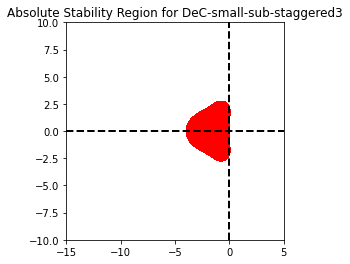

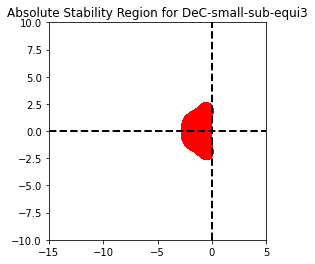

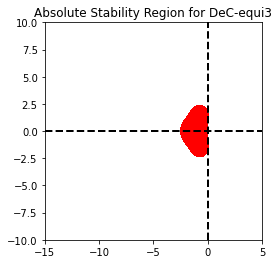

           5           4          3       2
-0.001302 x + 0.02083 x + 0.1667 x + 0.5 x + 1 x + 1
           6            5           4          3       2
0.0001085 x - 0.004774 x + 0.02604 x + 0.1667 x + 0.5 x + 1 x + 1
        3       2
0.1667 x + 0.5 x + 1 x + 1
!-----------------------------------!
!-----Order 4-----------------------!
!-----------------------------------!
DeC-small-sub-equi4 has order 4
DeC-small-sub-equi4 has 12 stages
DeC-equi4 has order 4
DeC-equi4 has 10 stages
DeC-small-sub-staggered4 has order 4
DeC-small-sub-staggered4 has 14 stages


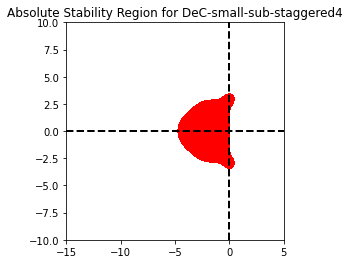

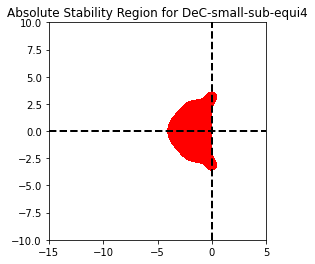

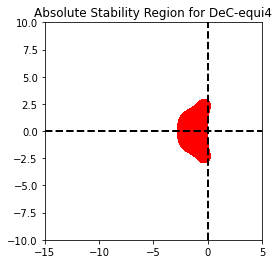

            9             8             7             6           5
-3.308e-07 x + 4.432e-06 x - 7.164e-05 x - 1.072e-05 x + 0.00628 x
            4          3       2
 + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
           12             11             10             9             8
1.361e-10 x  - 3.675e-09 x  + 1.507e-07 x  - 1.492e-06 x + 2.633e-05 x
              7             6            5           4          3
 + 5.001e-05 x + 0.0005573 x + 0.007716 x + 0.04167 x + 0.1667 x
        2
 + 0.5 x + 1 x + 1
         4          3       2
0.04167 x + 0.1667 x + 0.5 x + 1 x + 1
!-----------------------------------!
!-----Order 5-----------------------!
!-----------------------------------!
DeC-small-sub-equi5 has order 5
DeC-small-sub-equi5 has 20 stages
DeC-equi5 has order 5
DeC-equi5 has 17 stages
DeC-small-sub-staggered5 has order 5
DeC-small-sub-staggered5 has 23 stages


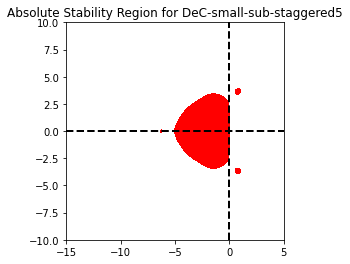

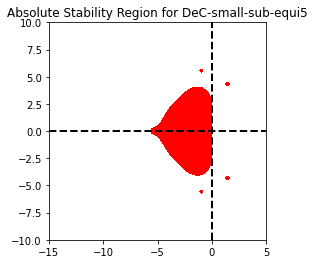

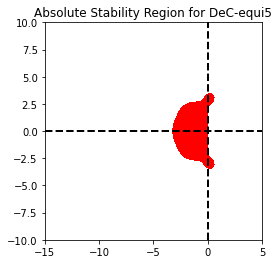

           14             13             12             11
4.214e-12 x  - 9.031e-11 x  + 1.102e-09 x  - 1.898e-08 x 
              10             9             8             7            6
 + 9.506e-08 x  + 3.239e-07 x - 1.618e-05 x + 3.725e-05 x + 0.001214 x
             5           4          3       2
 + 0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1


KeyboardInterrupt: 

In [3]:
for order in range(3,14):
    print("!-----------------------------------!")
    print("!-----Order %d-----------------------!"%order)
    print("!-----------------------------------!")
    dec_method = DeC_small_sub(order-1, order, "equispaced")
    A,b,c=dec_method.compute_RK_from_DeC()
    rk_small_sub_DeC = rk.ExplicitRungeKuttaMethod(A,b)
    rk_small_sub_DeC.name="DeC-small-sub-equi"+str(order)
    print(rk_small_sub_DeC.name+" has order "+str(rk_small_sub_DeC.order()))
    print(rk_small_sub_DeC.name+" has %d stages"%(len(rk_small_sub_DeC.c)))
    
    dec_method = DeC_small_sub_staggered(order-1, order, "equispaced")
    A,b,c=dec_method.compute_RK_from_DeC()
    rk_small_sub_stag_DeC = rk.ExplicitRungeKuttaMethod(A,b)
    rk_small_sub_stag_DeC.name="DeC-small-sub-staggered"+str(order)
    
    
    dec_method = DeC(order-1, order, "equispaced")
    A,b,c=dec_method.compute_RK_from_DeC()
    rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
    rkDeC.name="DeC-equi"+str(order)
    
    print(rkDeC.name+" has order "+str(rkDeC.order()))
    print(rkDeC.name+" has %d stages"%(len(rkDeC.c)))
    print(rk_small_sub_stag_DeC.name+" has order "+str(rk_small_sub_stag_DeC.order()))
    print(rk_small_sub_stag_DeC.name+" has %d stages"%(len(rk_small_sub_stag_DeC.c)))
    
    p0=rk_small_sub_stag_DeC.plot_stability_region(bounds=[-15,5,-10,10])
    plt.show()
    p1=rk_small_sub_DeC.plot_stability_region(bounds=[-15,5,-10,10])
    plt.show()
    p2=rkDeC.plot_stability_region(bounds=[-15,5,-10,10])
    plt.show()
    if order<=5:
        p,d = rk_small_sub_stag_DeC.stability_function()
        print(p)
        p,d = rk_small_sub_DeC.stability_function()
        print(p)
        p,d = rkDeC.stability_function()
        print(p)


In [10]:
plt.show()

In [6]:
len(dec_method.interpolation_matrices)

8

In [8]:
A.shape[1]*"%1.3f "

'%1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f '

In [5]:
sum(A[-3,:])

0.24999999999999997

In [1]:
from src.DeC import * 
from nodepy import rk

methods = [DeC_small_sub, DeC_small_sub_staggered_f,DeC_small_sub_staggered]
methods_base_name = ["DeC_small_sub", "DeC_small_sub_stag_f", "DeC_small_sub_stag"]
for order in range(3,14):
    print("!-----------------------------------!")
    print("!-----Order %d-----------------------!"%order)
    print("!-----------------------------------!")
    
    for im, method in enumerate(methods):
        dec_method = method(order-1, order, "equispaced")
        A,b,c=dec_method.compute_RK_from_DeC()
        rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
        rkDeC.name=methods_base_name[im]+"-equi"+str(order)
        print(rkDeC.name+" has order "+str(rkDeC.order()))
        print(rkDeC.name+" has %d stages"%(len(rkDeC.c)))
        
        dec_method = method(int((order+1)//2), order, "gaussLobatto")
        A,b,c=dec_method.compute_RK_from_DeC()
        rkDeC = rk.ExplicitRungeKuttaMethod(A,b)
        rkDeC.name=methods_base_name[im]+"-GLB"+str(order)
        print(rkDeC.name+" has order "+str(rkDeC.order()))
        print(rkDeC.name+" has %d stages"%(len(rkDeC.c)))




!-----------------------------------!
!-----Order 3-----------------------!
!-----------------------------------!
DeC_small_sub-equi3 has order 3
DeC_small_sub-equi3 has 6 stages
DeC_small_sub-GLB3 has order 3
DeC_small_sub-GLB3 has 6 stages
DeC_small_sub_stag_f-equi3 has order 3
DeC_small_sub_stag_f-equi3 has 5 stages
DeC_small_sub_stag_f-GLB3 has order 3
DeC_small_sub_stag_f-GLB3 has 5 stages
DeC_small_sub_stag-equi3 has order 3
DeC_small_sub_stag-equi3 has 7 stages
DeC_small_sub_stag-GLB3 has order 3
DeC_small_sub_stag-GLB3 has 7 stages
!-----------------------------------!
!-----Order 4-----------------------!
!-----------------------------------!
DeC_small_sub-equi4 has order 4
DeC_small_sub-equi4 has 12 stages
DeC_small_sub-GLB4 has order 4
DeC_small_sub-GLB4 has 8 stages
DeC_small_sub_stag_f-equi4 has order 4
DeC_small_sub_stag_f-equi4 has 9 stages
DeC_small_sub_stag_f-GLB4 has order 4
DeC_small_sub_stag_f-GLB4 has 7 stages
DeC_small_sub_stag-equi4 has order 4
DeC_small_sub_stag

## Gauss-Lobatto

In [9]:
decgl.thetas

[array([[0. , 0.5],
        [0. , 0.5]]),
 array([[0. , 0.5],
        [0. , 0.5]]),
 array([[ 0.        ,  0.20833333,  0.16666667],
        [ 0.        ,  0.33333333,  0.66666667],
        [ 0.        , -0.04166667,  0.16666667]])]

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.14606553  0.18426213 -0.05393447  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.22060113  0.48240453  0.02060113  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.16666667  0.66666667  0.16666667  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

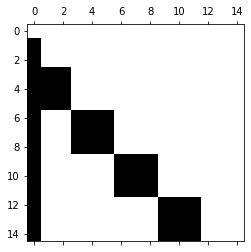

In [4]:
decgl=DeC_staggered(3,6,"gaussLobatto")
A,b,c=decgl.compute_RK_from_DeC()
plt.spy(A)
print(A)
print(b)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.5         0.          0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.        ]
 [ 0.20833333  0.33333333 -0.04166667  0.          0.        ]
 [ 0.16666667  0.66666667  0.16666667  0.          0.        ]]
[0.16666667 0.         0.         0.66666667 0.16666667]


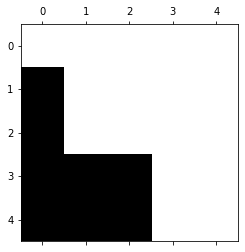

In [31]:
decgl=DeC_staggered(2,3,"equispaced")
A,b,c=decgl.compute_RK_from_DeC()
plt.spy(A)
print(A)
print(b)

In [28]:
def costo_glb(p):
    M=p-1
    K=p
    return M*(K-1)+1

def costo_glb_stag(p):
    M=p-1
    return costo_glb(p)-int((M-2)*(M-1)/2)


def costo_glb_stag_f(p):
    M=p-1
    return costo_glb_stag(p)-M+1

for order in range(2,15):
    print(f" {order-1} & {order} & {costo_glb(order)} & {costo_glb_stag(order)}  & {costo_glb_stag_f(order)}  \\\\")
    
for order in range(2,15):
    print(f"& {costo_glb(order)} & {costo_glb_stag(order)}  & {costo_glb_stag_f(order)}  \\\\")


 1 & 2 & 2 & 2  & 2  \\
 2 & 3 & 5 & 5  & 4  \\
 3 & 4 & 10 & 9  & 7  \\
 4 & 5 & 17 & 14  & 11  \\
 5 & 6 & 26 & 20  & 16  \\
 6 & 7 & 37 & 27  & 22  \\
 7 & 8 & 50 & 35  & 29  \\
 8 & 9 & 65 & 44  & 37  \\
 9 & 10 & 82 & 54  & 46  \\
 10 & 11 & 101 & 65  & 56  \\
 11 & 12 & 122 & 77  & 67  \\
 12 & 13 & 145 & 90  & 79  \\
 13 & 14 & 170 & 104  & 92  \\
& 2 & 2  & 2  \\
& 5 & 5  & 4  \\
& 10 & 9  & 7  \\
& 17 & 14  & 11  \\
& 26 & 20  & 16  \\
& 37 & 27  & 22  \\
& 50 & 35  & 29  \\
& 65 & 44  & 37  \\
& 82 & 54  & 46  \\
& 101 & 65  & 56  \\
& 122 & 77  & 67  \\
& 145 & 90  & 79  \\
& 170 & 104  & 92  \\


In [8]:
def costo_glb(p):
    M=int((p+1)//2)
    K=p
    return M*(K-1)+1

def costo_glb_stag(p):
    M = int((p+1)//2)
    return costo_glb(p)-int((M-2)*(M-1)/2)


def costo_glb_stag_f(p):
    M = int((p+1)//2)
    return costo_glb_stag(p)-M+1

for order in range(2,15):
    print(f" {order-1} & {order} & {costo_glb(order)} & {costo_glb_stag(order)}  & {costo_glb_stag_f(order)}  \\\\")
    
for order in range(2,15):
    print(f"& {costo_glb(order)} & {costo_glb_stag(order)}  & {costo_glb_stag_f(order)}  \\\\")


 1 & 2 & 2 & 2  & 2  \\
 2 & 3 & 5 & 5  & 4  \\
 3 & 4 & 7 & 7  & 6  \\
 4 & 5 & 13 & 12  & 10  \\
 5 & 6 & 16 & 15  & 13  \\
 6 & 7 & 25 & 22  & 19  \\
 7 & 8 & 29 & 26  & 23  \\
 8 & 9 & 41 & 35  & 31  \\
 9 & 10 & 46 & 40  & 36  \\
 10 & 11 & 61 & 51  & 46  \\
 11 & 12 & 67 & 57  & 52  \\
 12 & 13 & 85 & 70  & 64  \\
 13 & 14 & 92 & 77  & 71  \\
& 2 & 2  & 2  \\
& 5 & 5  & 4  \\
& 7 & 7  & 6  \\
& 13 & 12  & 10  \\
& 16 & 15  & 13  \\
& 25 & 22  & 19  \\
& 29 & 26  & 23  \\
& 41 & 35  & 31  \\
& 46 & 40  & 36  \\
& 61 & 51  & 46  \\
& 67 & 57  & 52  \\
& 85 & 70  & 64  \\
& 92 & 77  & 71  \\


In [8]:
#Test convergence of DeC for several orders
pr=ODEproblem("linear_system2")

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error


tt=np.linspace(0,pr.T_fin,20)   #Plot the evolution for order 8
order=6
dec_glb_stag = DeC_staggered((order+1)//2, order, "gaussLobatto")   
%time tt,uu=dec_glb_stag.dec(pr.flux, tt, pr.u0)

 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 sono in mezzo
3
 sono in mezzo
6
 sono in mezzo
9
 sono in mezzo
12
15
 sono in mezzo
1
 son

stag
CPU times: user 618 µs, sys: 18 µs, total: 636 µs
Wall time: 504 µs
CPU times: user 230 µs, sys: 0 ns, total: 230 µs
Wall time: 235 µs
CPU times: user 237 µs, sys: 0 ns, total: 237 µs
Wall time: 242 µs
CPU times: user 233 µs, sys: 0 ns, total: 233 µs
Wall time: 238 µs
CPU times: user 185 µs, sys: 0 ns, total: 185 µs
Wall time: 189 µs
CPU times: user 184 µs, sys: 0 ns, total: 184 µs
Wall time: 187 µs
stag
CPU times: user 580 µs, sys: 0 ns, total: 580 µs
Wall time: 563 µs
CPU times: user 433 µs, sys: 0 ns, total: 433 µs
Wall time: 438 µs
CPU times: user 469 µs, sys: 0 ns, total: 469 µs
Wall time: 472 µs
CPU times: user 460 µs, sys: 0 ns, total: 460 µs
Wall time: 465 µs
CPU times: user 386 µs, sys: 0 ns, total: 386 µs
Wall time: 389 µs
CPU times: user 376 µs, sys: 0 ns, total: 376 µs
Wall time: 379 µs
stag
CPU times: user 1.06 ms, sys: 0 ns, total: 1.06 ms
Wall time: 994 µs
CPU times: user 888 µs, sys: 0 ns, total: 888 µs
Wall time: 892 µs
CPU times: user 921 µs, sys: 0 ns, total: 92

stag
CPU times: user 1.22 ms, sys: 35 µs, total: 1.25 ms
Wall time: 1.23 ms
CPU times: user 1.44 ms, sys: 41 µs, total: 1.48 ms
Wall time: 1.49 ms
CPU times: user 1.11 ms, sys: 0 ns, total: 1.11 ms
Wall time: 1.12 ms
CPU times: user 1.62 ms, sys: 0 ns, total: 1.62 ms
Wall time: 1.62 ms
CPU times: user 1.14 ms, sys: 0 ns, total: 1.14 ms
Wall time: 1.15 ms
CPU times: user 2.8 ms, sys: 0 ns, total: 2.8 ms
Wall time: 2.81 ms
stag
CPU times: user 2.96 ms, sys: 0 ns, total: 2.96 ms
Wall time: 2.96 ms
CPU times: user 3.73 ms, sys: 0 ns, total: 3.73 ms
Wall time: 3.75 ms
CPU times: user 2.83 ms, sys: 0 ns, total: 2.83 ms
Wall time: 2.8 ms
CPU times: user 5.99 ms, sys: 2 µs, total: 5.99 ms
Wall time: 4.76 ms
CPU times: user 2.68 ms, sys: 0 ns, total: 2.68 ms
Wall time: 2.69 ms
CPU times: user 5.27 ms, sys: 16 µs, total: 5.28 ms
Wall time: 5.29 ms
stag
CPU times: user 5.14 ms, sys: 0 ns, total: 5.14 ms
Wall time: 5.12 ms
CPU times: user 7.45 ms, sys: 0 ns, total: 7.45 ms
Wall time: 7.45 ms
CPU t

CPU times: user 86.6 ms, sys: 0 ns, total: 86.6 ms
Wall time: 86 ms
CPU times: user 67.8 ms, sys: 0 ns, total: 67.8 ms
Wall time: 67.8 ms
CPU times: user 137 ms, sys: 0 ns, total: 137 ms
Wall time: 136 ms


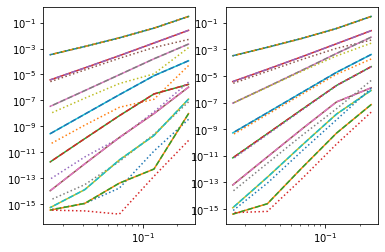

In [7]:
NN=5


dts=[pr.T_fin/2.0**k for k in range(2,2+NN)]

max_order=10
errors_glb_stag_f=np.zeros((max_order, NN))
errors_equi_stag_f=np.zeros((max_order, NN))
errors_glb_stag=np.zeros((max_order, NN))
errors_equi_stag=np.zeros((max_order, NN))
errors_glb =np.zeros((max_order, NN))
errors_equi =np.zeros((max_order, NN))

fig, axs = plt.subplots(1,2)


# Compute and plot the errors 
for order in range(2,max_order):
    dec_equi_stag_f = DeC_small_sub_staggered_f(order-1, order, "equispaced")   
    dec_glb_stag_f = DeC_small_sub_staggered_f((order+1)//2, order, "gaussLobatto")    
    dec_equi_stag = DeC_small_sub_staggered(order-1, order, "equispaced")   
    dec_glb_stag = DeC_small_sub_staggered((order+1)//2, order, "gaussLobatto")    
    dec_glb  = DeC_small_sub((order+1)//2, order, "gaussLobatto")
    dec_equi  = DeC_small_sub(order-1, order, "equispaced")
    for it, dt in enumerate(dts):
        tt=np.arange(0,pr.T_fin,dt)
        
        print("stag")
        %time tt,uu=dec_glb_stag_f.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errors_glb_stag_f[order,it]=compute_integral_error(uu,u_exact)
        
        %time tt,uu=dec_equi_stag_f.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errors_equi_stag_f[order,it]=compute_integral_error(uu,u_exact)
        
        
        %time tt,uu=dec_glb_stag.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errors_glb_stag[order,it]=compute_integral_error(uu,u_exact)
        
        %time tt,uu=dec_equi_stag.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errors_equi_stag[order,it]=compute_integral_error(uu,u_exact)
        
        %time tt,uu=dec_glb.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errors_glb[order,it]=compute_integral_error(uu,u_exact)
        
        %time tt,uu=dec_equi.dec(pr.flux, tt, pr.u0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        errors_equi[order,it]=compute_integral_error(uu,u_exact)
        
    axs[1].loglog(dts,errors_glb_stag_f[order,:],label=f"order {order}")
    axs[1].loglog(dts,errors_glb_stag[order,:],'--',label=f"order {order}")
    axs[1].loglog(dts,errors_glb[order,:],":",label=f"order {order}")
    axs[0].loglog(dts,errors_equi_stag_f[order,:],label=f"order {order}")
    axs[0].loglog(dts,errors_equi_stag[order,:],"--",label=f"order {order}")
    axs[0].loglog(dts,errors_equi[order,:],":",label=f"order {order}")

## Adaptive DeC

CPU times: user 2.06 ms, sys: 0 ns, total: 2.06 ms
Wall time: 2.06 ms
error DeC4 2.2258432525226795e-05
CPU times: user 3.96 ms, sys: 0 ns, total: 3.96 ms
Wall time: 3.82 ms
error DeC5 1.1799970442257752e-06
CPU times: user 13.6 ms, sys: 3.88 ms, total: 17.5 ms
Wall time: 17.2 ms
error DeC10 6.809437747483137e-14
CPU times: user 7.98 ms, sys: 0 ns, total: 7.98 ms
Wall time: 7.91 ms
error adaptive 2.8861161724002673e-08


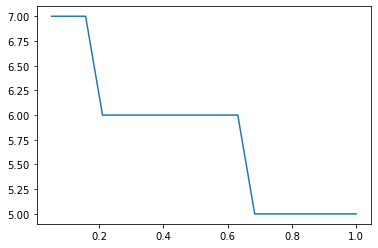

In [6]:
#Test convergence of DeC for several orders
pr=ODEproblem("linear_system2")

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error




tt=np.linspace(0,pr.T_fin,20)   #Plot the evolution for order 8

dec4 = DeC_staggered(3, 4, "equispaced")
dec5 = DeC_staggered(4, 5, "equispaced")
dec10 = DeC_staggered(9, 10, "equispaced")
dec_ad = DeC_staggered_f(12, 13, "equispaced")
tol = 1e-6

%time tt,uu=dec4.dec(pr.flux, tt, pr.u0)
u_exact=pr.exact_solution_times(pr.u0,tt)
error=compute_integral_error(uu,u_exact)
print(f"error DeC4 {error}")


%time tt,uu=dec5.dec(pr.flux, tt, pr.u0)
u_exact=pr.exact_solution_times(pr.u0,tt)
error=compute_integral_error(uu,u_exact)
print(f"error DeC5 {error}")


%time tt,uu=dec10.dec(pr.flux, tt, pr.u0)
u_exact=pr.exact_solution_times(pr.u0,tt)
error=compute_integral_error(uu,u_exact)
print(f"error DeC10 {error}")

%time tt,uu, ps=dec_ad.dec_order_control(pr.flux, tt, pr.u0, tol)
u_exact=pr.exact_solution_times(pr.u0,tt)
error=compute_integral_error(uu,u_exact)
print(f"error adaptive {error}")

plt.plot(tt[1:],ps[1:])

In [ ]:
# plt.plot(tt,uu[1,:])
# plt.show()

colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",\
       "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

NN=5
dts=[pr.T_fin/2.0**k for k in range(2,2+NN)]


methods = [DeC, DeC_staggered, DeC_staggered_f, DeC_small_sub, DeC_small_sub_staggered, DeC_small_sub_staggered_f]
N_meth = len(methods)

errors=np.zeros((N_meth,len(dts)))
times =np.zeros((N_meth,len(dts)))

fig1,ax1 = plt.subplots(1,1)
fig2,ax2 = plt.subplots(1,1)
fig3,ax3 = plt.subplots(1,1)
fig4,ax4 = plt.subplots(1,1)



# Compute and plot the errors 
for order in range(2,3):
    myFile = open(f'convergence_{pr.name}_order_{order}.csv', 'w')
    with myFile:
        writer = csv.writer(myFile)
        myData = ["dt"]
        for met in methods:
            myData.append("error "+met(1,2,"equispaced").name)            
        for met in methods:
            myData.append("time "+met(1,2,"equispaced").name)
        writer.writerow(myData)
        print("order=",order)
        for k in range(NN):
            dt0=dts[k]
            print("dt is ",dt0)
            tt=np.arange(0,pr.T_fin,dt0)
            M_sub = order-1
            K_iter = order

            for im, method in enumerate(methods):
                # Staggered DeC
                dec = method(M_sub, K_iter, "equispaced")
                res = %timeit -o dec.dec(pr.flux, tt, pr.u0)
                times[im,k] = res.average
                t2,U2=dec.dec(pr.flux, tt, pr.u0)
                u_exact=pr.exact_solution_times(pr.u0,tt)
                errors[im,k]=compute_integral_error(U2,u_exact)
                print(f"error {errors[im,k]}")
            
            
            myData = [dt0]
            for im in range(N_meth):
                myData.append(errors[im,k])
            for im in range(N_meth):
                myData.append(times[im,k])
            writer.writerow(myData)
            
            
            for im, method in enumerate(methods):
                print("speed up factor "+method(1,2,"equispaced").name, times[(im//3)*3,k]/times[im,k] )
            
        ax1.loglog(dts,errors[0,:],"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,errors[1,:],"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,errors[2,:],"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax1.loglog(dts,[dt**(order)*errors[0,2]/dts[2]**(order) for dt in dts],":",color=colors[order])#,label="ref %d"%(order))

        ax2.loglog(times[0,:],errors[0,:],"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax2.loglog(times[1,:],errors[1,:],"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax2.loglog(times[2,:],errors[2,:],"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
    #    ax2.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))

                
        ax3.loglog(dts,errors[3,:],"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax3.loglog(dts,errors[4,:],"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax3.loglog(dts,errors[5,:],"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax3.loglog(dts,[dt**(order)*errors[3,2]/dts[2]**(order) for dt in dts],":",color=colors[order])#,label="ref %d"%(order))

        ax4.loglog(times[3,:],errors[3,:],"-",color=colors[order],label="DeC(%d,%d)"%(M_sub,K_iter))
        ax4.loglog(times[4,:],errors[4,:],"--",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
        ax4.loglog(times[5,:],errors[5,:],"-.",color=colors[order])#,label="DeCStag(%d,%d)"%(M_sub,K_iter))
    #    ax2.loglog(dts,[dt**(order)*errorsDeC[2]/dts[2]**(order) for dt in dts],":",label="ref %d"%(order))

    

ax1.set_title("DeC error convergence")
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylabel("Error")
ax1.set_xlabel(r"$\Delta t$")
plt.tight_layout()
fig1.savefig(f"convergence_DeC_staggered_{pr.name}.pdf")

ax2.set_title("DeC error convergence")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylabel("Error")
ax2.set_xlabel("Computational time")
plt.tight_layout()
fig2.savefig(f"convergence_vs_time_DeC_staggered_{pr.name}.pdf")


ax3.set_title("DeC error convergence")
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.set_ylabel("Error")
ax3.set_xlabel(r"$\Delta t$")
plt.tight_layout()
fig3.savefig(f"convergence_DeC_staggered_small_sub_{pr.name}.pdf")

ax4.set_title("DeC error convergence")
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax4.set_ylabel("Error")
ax4.set_xlabel("Computational time")
plt.tight_layout()
fig4.savefig(f"convergence_vs_time_DeC_staggered_small_sub_{pr.name}.pdf")


plt.show()